In [313]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("titanic-passengers.csv",sep=";")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [314]:
print(data.info())
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB
None


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [315]:
data.drop("Cabin",axis=1,inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,S


In [316]:
#data cleaning
data["Age"].fillna(data["Age"].mode()[0],inplace=True)
data["Embarked"].fillna('S',inplace=True)
print(data["Embarked"].value_counts())


S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [317]:
emb_rep={"Embarked":{"S":1,"C":2,"Q":3}}
data.replace(emb_rep,inplace=True)
survived={"Survived":{'Yes':1,"No":0}}
data.replace(survived,inplace=True)
sex={"Sex":{"male":1, "female":0}}
data.replace(sex,inplace=True) 
data




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,1
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,1
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,2
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,2
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,1
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,24.0,0,0,349215,7.8958,1


In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


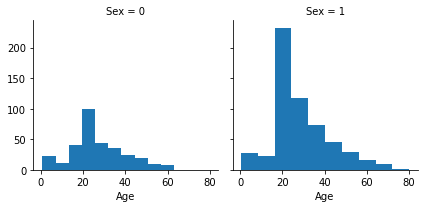

In [319]:
#correlation between sex and age
grid=sns.FacetGrid(data,col="Sex")
grid.map(plt.hist,"Age")


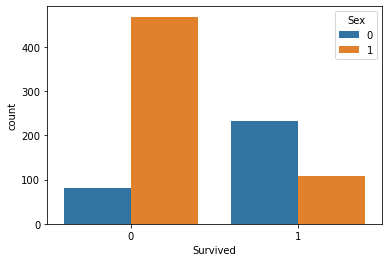

In [320]:
ax = sns.countplot(x="Survived", hue="Sex", data=data)

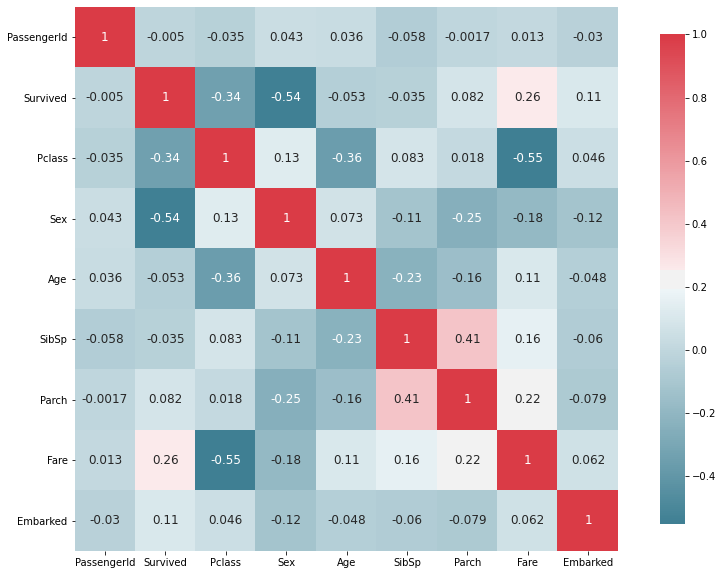

In [321]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =(15 , 10 ) )
    #changes heatmap colors
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        #changes the shape of the seaborn heatmap to squares
        square=True, 
        #Changes the height of the heatmap colorbar
        cbar_kws={ 'shrink' : 0.9 }, 
        ax=ax, 
        annot = True, 
        #Changes the size of the font size
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(data)


This function returns a defined function that returns seaborn correlation heatmap between numerical features. by changing some parameters we can change the output of the function :
 s , ax = plt.subplots( figsize =(15 , 10 ) ) : changes the figure size of the heatmap
 cmap = sns.diverging_palette( 220 , 10 , as_cmap = True ) : changes the heatmap colors
 square=True : changes the shape of the seaborn heatmap to squares
 cbar_kws={ 'shrink' : 0.9 } : Changes the length of the heatmap colorbar
 annot_kws = { 'fontsize' : 12 } : changes the font size


In [322]:
data[["Survived","Pclass"]].groupby(["Survived"],as_index=True).mean()


,Pclass
Survived,
0,2.531876
1,1.950292


In [323]:
data["Title"] = data.Name.str.split(".").str[0]
data["Title"] = data.Title.str.split(",").str[1]
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,1,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,1,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,1,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,1,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,2,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,2,Mr
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,1,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,24.0,0,0,349215,7.8958,1,Mr


D:\Program Files\Anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Program Files\Anaconda\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


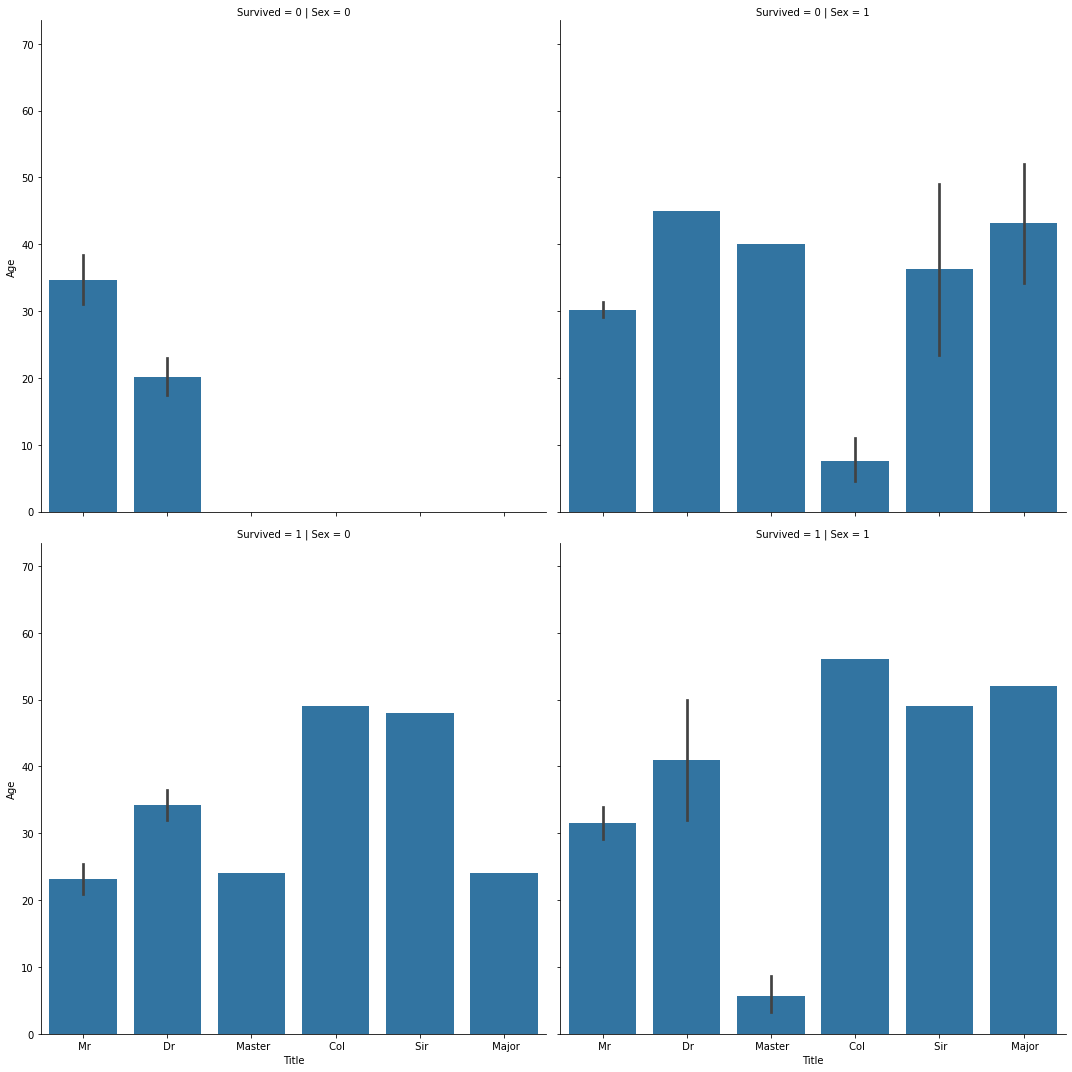

In [324]:
grid=sns.FacetGrid(data,row="Survived",col="Sex" ,size=7.5 )
grid.map(sns.barplot,'Title',"Age")


In [ ]:
data.drop("Name",axis=1,inplace=True)

In [325]:

Title_Dictionary = {'Title':{

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"}
                    }
data.replace(Title_Dictionary, inplace=True) 
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,1,28.0,0,0,248740,13.0000,1,Mr
1,76,0,3,1,25.0,0,0,348123,7.6500,1,Mr
2,641,0,3,1,20.0,0,0,350050,7.8542,1,Mr
3,568,0,3,0,29.0,0,4,349909,21.0750,1,Mrs
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.0,1,0,237736,30.0708,2,Mrs
887,61,0,3,1,22.0,0,0,2669,7.2292,2,Mr
888,535,0,3,0,30.0,0,0,315084,8.6625,1,Miss
889,102,0,3,1,24.0,0,0,349215,7.8958,1,Mr
